In [1]:
import collections
import numpy as np
import pickle
import time
import librosa
import librosa.display
import os
import cv2 as cv
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.tensorboard.writer import SummaryWriter
from PIL import Image

C:\Users\BBA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])


In [2]:
with open('data/ygroup2', 'rb') as f:
    audio_data = pickle.load(f)

In [8]:

for x in range(19):
    num = 0
    genre = []
    while True:
        if audio_data[num][1] == 4:
            genre.append(audio_data[num][0])
        num += 1
        if len(genre) >= 400:
            break


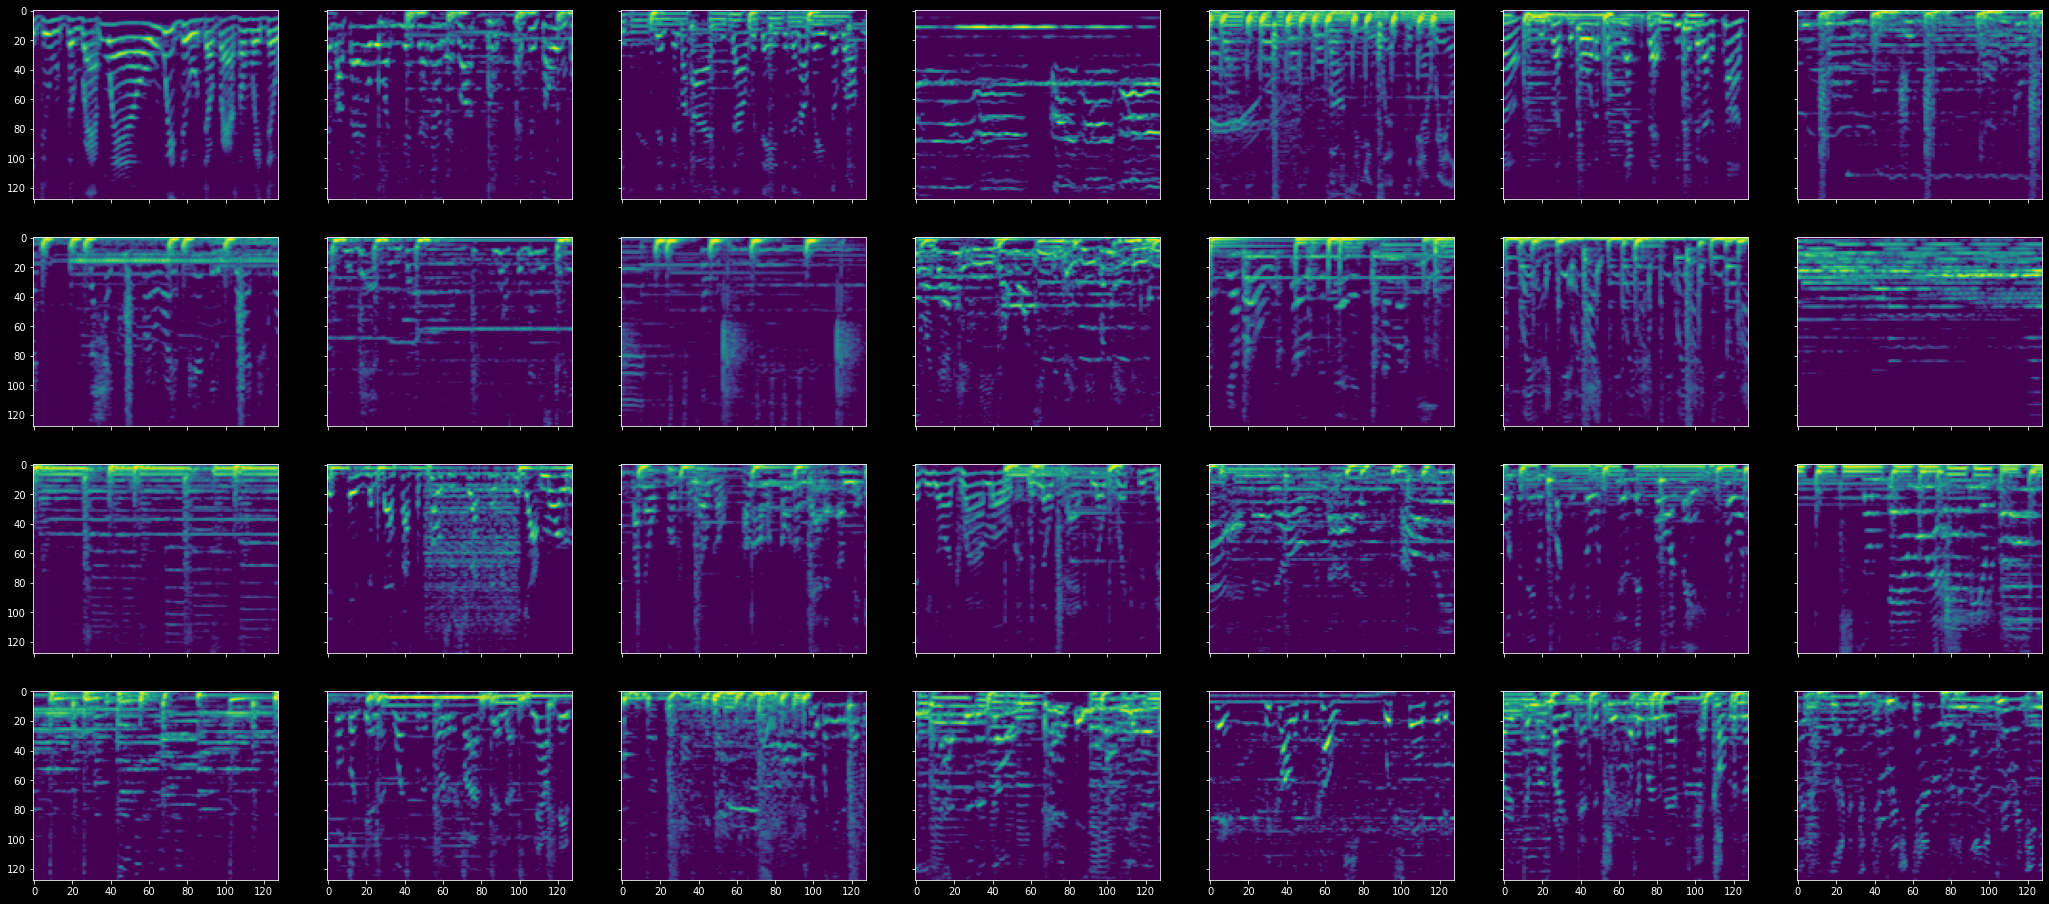

In [20]:
np.random.shuffle(genre)
fig, axs = plt.subplots(4, 7, sharex=True, sharey=True)
fig.set_size_inches(36, 16)
for x in range(4):
    for y in range(7):
        axs[x][y].imshow(genre[(x * 9) + y], aspect='auto')

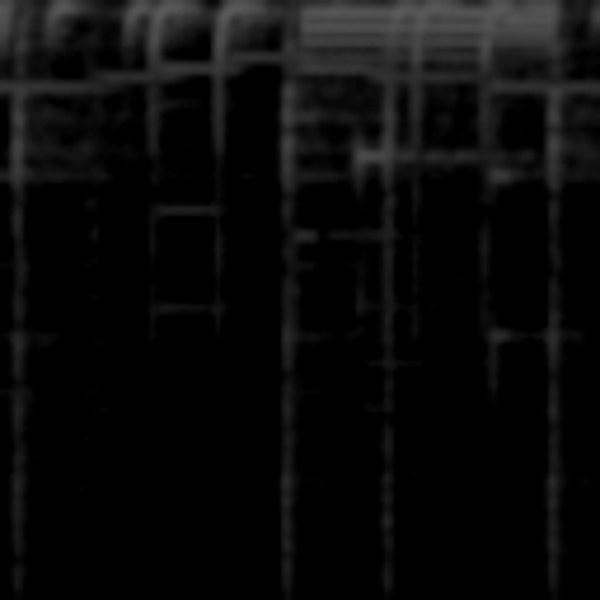

In [169]:
display(Image.fromarray(np.uint8(test)).resize((600, 600)))

In [210]:
genre = np.array([x.flatten() for x in genre], dtype=np.int16) * 128
avgenre = np.mean(genre, axis=0)
msgenre = np.array([x - avgenre for x in genre], dtype=np.int16)
u, s, v = np.linalg.svd(msgenre, full_matrices=False)

rank = 256
components = v[:rank]
projected = u[:, :rank] * s[:rank]
eigenre = components.reshape((rank, 128, 128))

In [207]:
eigenre.shape

(256, 128, 128)

In [205]:
np.max(eigenre[0])

0.025180874577995886

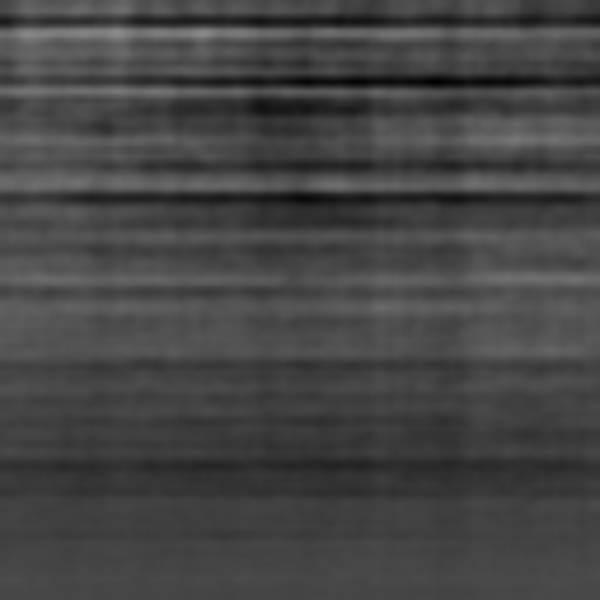

In [247]:
egnr = 14
display(Image.fromarray(np.uint8((eigenre[egnr] * 2048) - np.min(eigenre[egnr] * 2048))).resize((600, 600)))

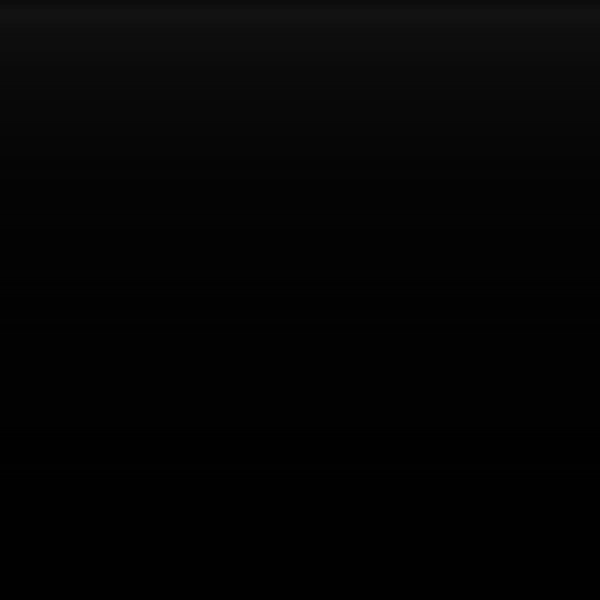

In [171]:
display(Image.fromarray(np.int16(avgenre)).resize((600, 600)))

In [195]:
avgenre.shape

(16384,)

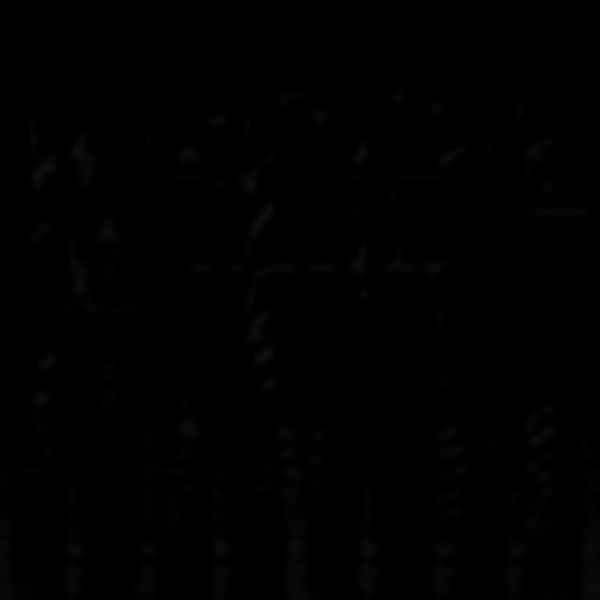

In [196]:
display(Image.fromarray(np.int16(msgenre[0] - avgenre).reshape((128, 128))).resize((600, 600)))

1201.0996 -1196.7787


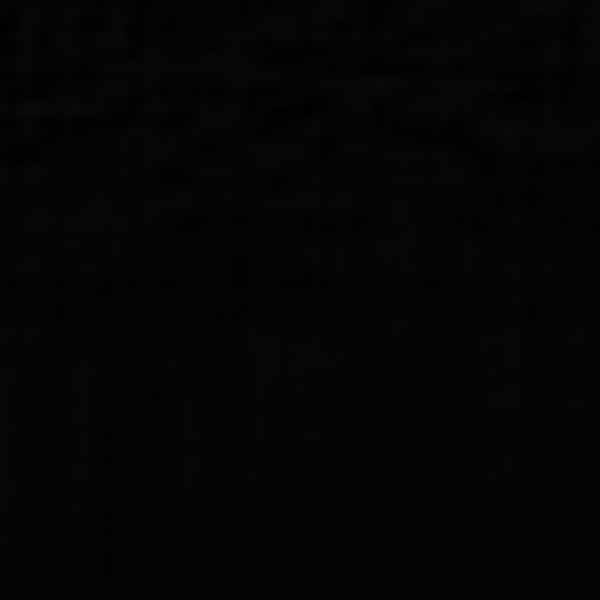

In [198]:
rank = 256
test = []
for x in u[rank]:
    test.append(s[rank] * x * v[rank])
test = np.array(test)

test2 = np.zeros((128, 128), dtype=np.float32)
for x in range(256):
    test2 += test[x].reshape(128, 128)

print(np.max(test2), np.min(test2))
display(Image.fromarray(np.int32(test2 - np.min(test2))).resize((600, 600)))

In [6]:
items = list(os.listdir(r'C:\Users\BBA\Coding\Audio\Classification\test'))

In [65]:
with open('train_labels', 'rt') as f:
    labels = f.readlines()
labels = [x.split(',') for x in labels]
labels = {x[1]: int(x[3]) for x in labels}
group = [x[0] for x in labels.items() if x[1] == 7]

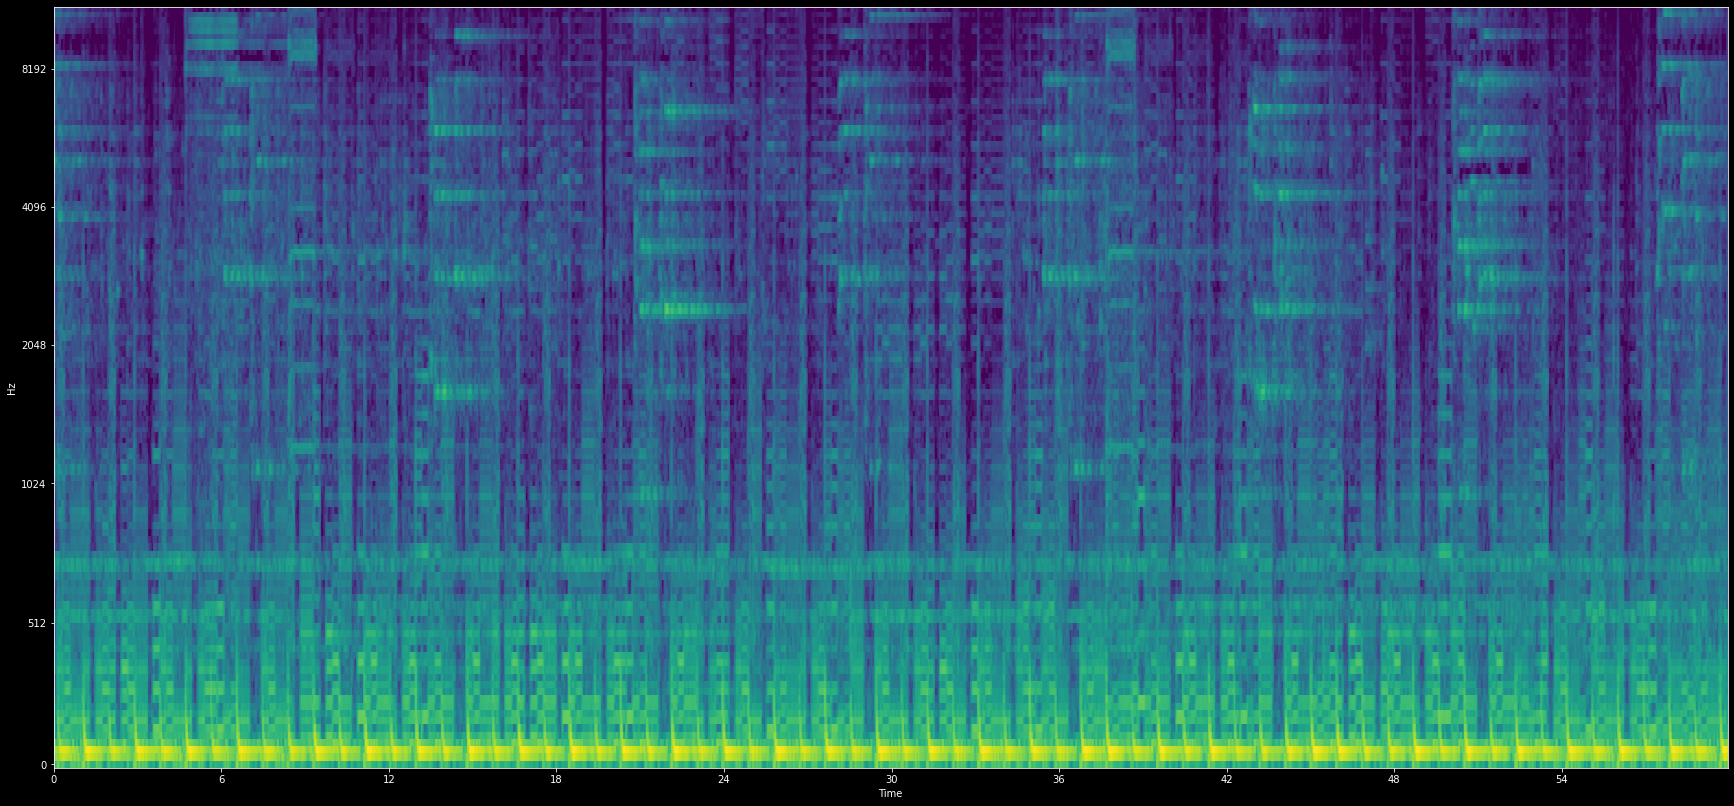

In [22]:
song, sr = librosa.load(f'test/{np.random.choice(items)}', sr=None)
print(sr)

scale = sr / 22050
msgram = librosa.feature.melspectrogram(y=song, sr=sr, fmax=4096,  n_fft=int(2048 * scale))
dbmsgram = librosa.power_to_db(msgram, ref=np.max)

fig = plt.figure(figsize=(30, 14))
ax = plt.axes()
librosa.display.specshow(dbmsgram, y_axis='mel', x_axis='time', ax=ax, cmap='viridis')
plt.show()


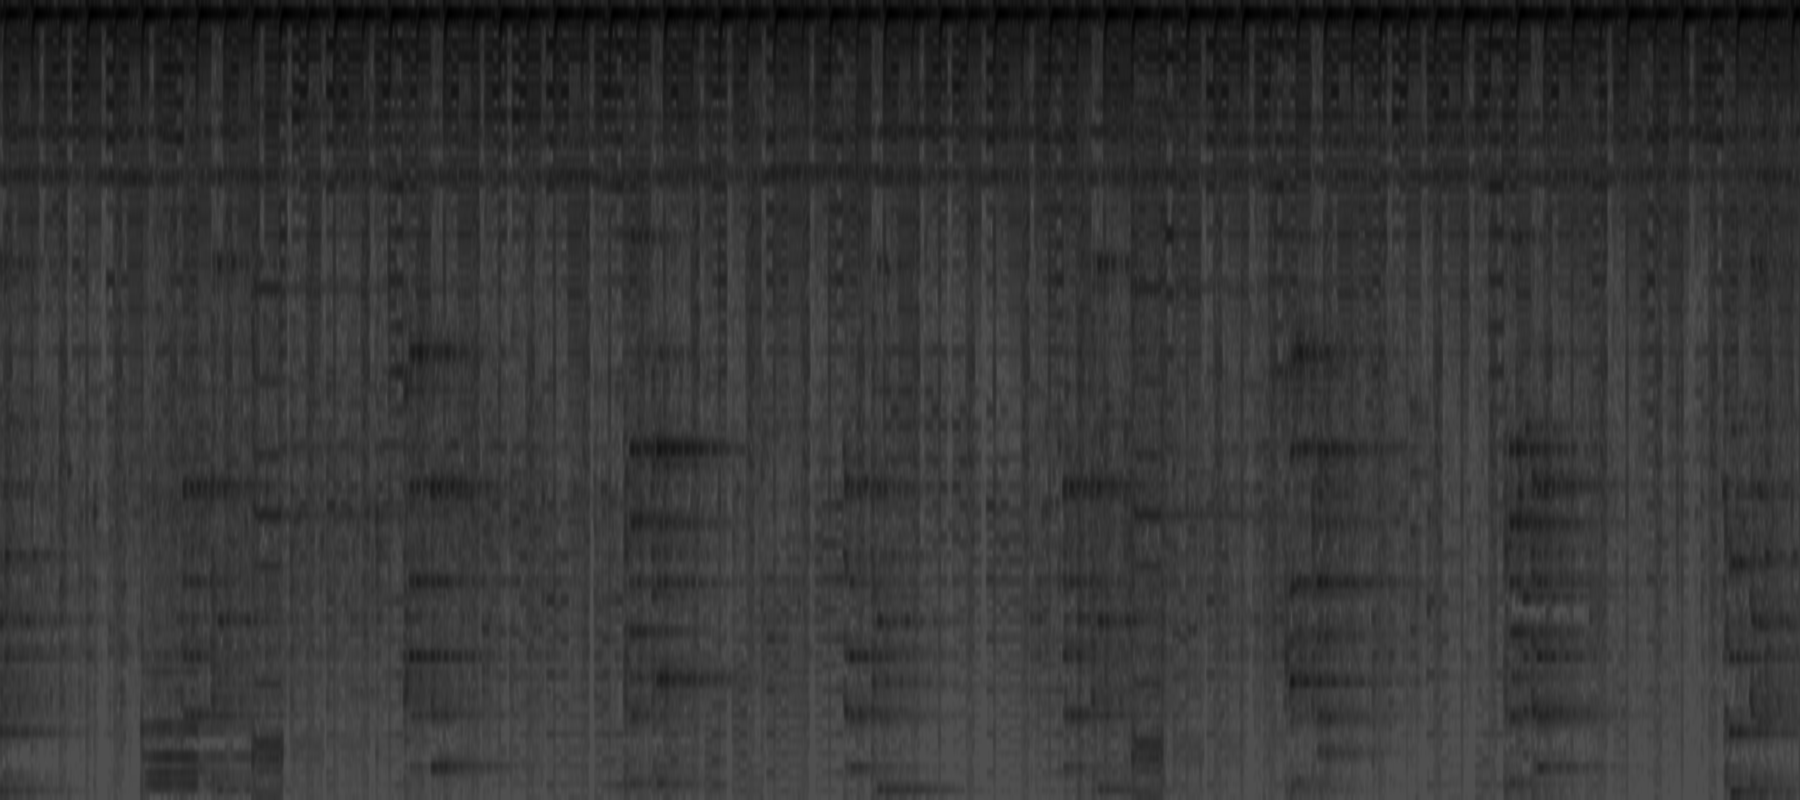

In [23]:
display(Image.fromarray(np.uint8(np.abs(dbmsgram))).resize((1800, 800)))